Copy và chỉnh sửa từ CNN_model.ipynb (Chưa thay đổi kiến trúc hay tham số mô hình) \
Dùng bộ dữ liệu cifar10 à ?

In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision import transforms
import os
import tarfile
import matplotlib.pyplot as plt
device = 'cuda' if torch.cuda.is_available() else 'cpu'
batch_size=1024

In [2]:
if not os.path.exists('./data_encoder'):
    if not os.path.exists("./cifar10.tgz"):
        print("Dowloading file ...")
        import requests
        dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
        repsponse = requests.get(dataset_url)
        if repsponse.status_code == 200:
            with open("./cifar10.tgz", "wb") as file:
                file.write(repsponse.content)
            print("File downloaded")
        else:
            print(f"Network error {repsponse.status_code}")
            print(repsponse.text)
    with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
        tar.extractall(path='./data_encoder')
    os.remove("./cifar10.tgz")

train_ds=datasets.ImageFolder(root='./data_encoder/cifar10/train',transform=transforms.ToTensor())
test_ds=datasets.ImageFolder(root='./data_encoder/cifar10/test',transform=transforms.ToTensor())

n_workers = 2
train_loader=DataLoader(train_ds,batch_size=batch_size,shuffle=True, num_workers=2)
test_loader=DataLoader(test_ds,batch_size=batch_size,shuffle=False, num_workers=2)

In [3]:
def ConvLayer(inp, out, ks=3, s=1, p=1):
    return nn.Conv2d(inp,out,kernel_size=ks,stride=s,padding=p)
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.neural_net = nn.Sequential (
            ConvLayer(3, 32), nn.ReLU(),
            ConvLayer(32, 64), nn.ReLU(),
            nn.MaxPool2d(2, 2),
            ConvLayer(64, 128), nn.ReLU(),
            ConvLayer(128, 256), nn.ReLU(),
            nn.MaxPool2d(2, 2),
            ConvLayer(256, 512), nn.ReLU(),
            ConvLayer(512, 1024), nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Flatten(),
            nn.Linear(1024*4*4, 1024), nn.ReLU(),
            nn.Linear(1024, 512), nn.ReLU(),
            nn.Linear(512, 10),
    )
    def forward(self, x):
        return self.neural_net(x)
model = CNN().to(device)

Start train


  0%|          | 0/50 [00:00<?, ?it/s]

  2%|▏         | 1/50 [00:29<24:15, 29.71s/it]

Train loss : 6.2315 | Test loss : 2.3034 | Test accuracy : 0.1000 | Lr : 0.005


  4%|▍         | 2/50 [00:59<23:40, 29.60s/it]

Train loss : 2.3031 | Test loss : 2.3015 | Test accuracy : 0.1000 | Lr : 0.00475


  6%|▌         | 3/50 [01:28<23:07, 29.51s/it]

Train loss : 2.3024 | Test loss : 2.3020 | Test accuracy : 0.1140 | Lr : 0.0045125


  8%|▊         | 4/50 [01:58<22:42, 29.63s/it]

Train loss : 2.2394 | Test loss : 2.1031 | Test accuracy : 0.2115 | Lr : 0.004286875


 10%|█         | 5/50 [02:27<22:10, 29.56s/it]

Train loss : 1.9529 | Test loss : 1.8405 | Test accuracy : 0.3191 | Lr : 0.00407253125


 12%|█▏        | 6/50 [02:58<22:02, 30.07s/it]

Train loss : 1.7611 | Test loss : 1.6494 | Test accuracy : 0.3792 | Lr : 0.0038689046874999995


 14%|█▍        | 7/50 [03:29<21:36, 30.16s/it]

Train loss : 1.6458 | Test loss : 1.5484 | Test accuracy : 0.4226 | Lr : 0.003675459453124999


 16%|█▌        | 8/50 [03:59<21:01, 30.02s/it]

Train loss : 1.4983 | Test loss : 1.4513 | Test accuracy : 0.4669 | Lr : 0.003491686480468749


 18%|█▊        | 9/50 [04:28<20:28, 29.95s/it]

Train loss : 1.3786 | Test loss : 1.3447 | Test accuracy : 0.5064 | Lr : 0.0033171021564453113


 20%|██        | 10/50 [05:00<20:13, 30.33s/it]

Train loss : 1.2811 | Test loss : 1.3006 | Test accuracy : 0.5222 | Lr : 0.0031512470486230455


 22%|██▏       | 11/50 [05:31<19:58, 30.74s/it]

Train loss : 1.1819 | Test loss : 1.1950 | Test accuracy : 0.5657 | Lr : 0.001


 24%|██▍       | 12/50 [06:02<19:32, 30.85s/it]

Train loss : 1.1329 | Test loss : 1.1708 | Test accuracy : 0.5739 | Lr : 0.0009699999999999999


 26%|██▌       | 13/50 [06:33<18:56, 30.71s/it]

Train loss : 1.0983 | Test loss : 1.1535 | Test accuracy : 0.5830 | Lr : 0.0009408999999999999


 28%|██▊       | 14/50 [07:03<18:22, 30.64s/it]

Train loss : 1.0714 | Test loss : 1.1365 | Test accuracy : 0.5929 | Lr : 0.0009126729999999999


 30%|███       | 15/50 [07:35<18:08, 31.10s/it]

Train loss : 1.0452 | Test loss : 1.1331 | Test accuracy : 0.5972 | Lr : 0.0008852928099999999


 32%|███▏      | 16/50 [08:06<17:32, 30.96s/it]

Train loss : 1.0114 | Test loss : 1.1011 | Test accuracy : 0.6087 | Lr : 0.0008587340256999998


 34%|███▍      | 17/50 [08:36<16:52, 30.67s/it]

Train loss : 0.9813 | Test loss : 1.0778 | Test accuracy : 0.6165 | Lr : 0.0008329720049289999


 36%|███▌      | 18/50 [09:06<16:12, 30.41s/it]

Train loss : 0.9570 | Test loss : 1.0647 | Test accuracy : 0.6234 | Lr : 0.0008079828447811299


 38%|███▊      | 19/50 [09:36<15:38, 30.27s/it]

Train loss : 0.9281 | Test loss : 1.0533 | Test accuracy : 0.6254 | Lr : 0.0007837433594376959


 40%|████      | 20/50 [10:05<15:03, 30.12s/it]

Train loss : 0.9107 | Test loss : 1.0456 | Test accuracy : 0.6287 | Lr : 0.000760231058654565


 42%|████▏     | 21/50 [10:36<14:33, 30.14s/it]

Train loss : 0.8868 | Test loss : 1.0531 | Test accuracy : 0.6263 | Lr : 0.000737424126894928


 44%|████▍     | 22/50 [11:06<14:01, 30.07s/it]

Train loss : 0.8657 | Test loss : 1.0278 | Test accuracy : 0.6368 | Lr : 0.0007153014030880802


 46%|████▌     | 23/50 [11:35<13:29, 29.99s/it]

Train loss : 0.8397 | Test loss : 1.0322 | Test accuracy : 0.6444 | Lr : 0.0006938423609954377


 48%|████▊     | 24/50 [12:05<12:58, 29.93s/it]

Train loss : 0.8162 | Test loss : 1.0184 | Test accuracy : 0.6446 | Lr : 0.0006730270901655745


 50%|█████     | 25/50 [12:35<12:27, 29.89s/it]

Train loss : 0.7905 | Test loss : 1.0163 | Test accuracy : 0.6504 | Lr : 0.0006528362774606073


 52%|█████▏    | 26/50 [13:05<11:56, 29.86s/it]

Train loss : 0.7714 | Test loss : 1.0166 | Test accuracy : 0.6514 | Lr : 0.0006332511891367891


 54%|█████▍    | 27/50 [13:34<11:24, 29.77s/it]

Train loss : 0.7462 | Test loss : 1.0143 | Test accuracy : 0.6532 | Lr : 0.0006142536534626854


 56%|█████▌    | 28/50 [14:04<10:54, 29.73s/it]

Train loss : 0.7280 | Test loss : 1.0201 | Test accuracy : 0.6518 | Lr : 0.0005958260438588048


 58%|█████▊    | 29/50 [14:34<10:23, 29.70s/it]

Train loss : 0.7066 | Test loss : 1.0231 | Test accuracy : 0.6542 | Lr : 0.0005779512625430406


 60%|██████    | 30/50 [15:03<09:53, 29.67s/it]

Train loss : 0.6843 | Test loss : 1.0277 | Test accuracy : 0.6569 | Lr : 0.0005606127246667494


 62%|██████▏   | 31/50 [15:33<09:25, 29.74s/it]

Train loss : 0.6624 | Test loss : 1.0287 | Test accuracy : 0.6599 | Lr : 0.0005437943429267469


 64%|██████▍   | 32/50 [16:03<08:54, 29.71s/it]

Train loss : 0.6397 | Test loss : 1.0308 | Test accuracy : 0.6594 | Lr : 0.0005274805126389445


 66%|██████▌   | 33/50 [16:32<08:24, 29.66s/it]

Train loss : 0.6244 | Test loss : 1.0349 | Test accuracy : 0.6600 | Lr : 0.0005116560972597762


 68%|██████▊   | 34/50 [17:02<07:55, 29.75s/it]

Train loss : 0.6013 | Test loss : 1.0580 | Test accuracy : 0.6579 | Lr : 0.0004963064143419829


 70%|███████   | 35/50 [17:32<07:25, 29.69s/it]

Train loss : 0.5827 | Test loss : 1.0722 | Test accuracy : 0.6622 | Lr : 0.00048141722191172336


 72%|███████▏  | 36/50 [18:02<06:55, 29.71s/it]

Train loss : 0.5652 | Test loss : 1.0849 | Test accuracy : 0.6585 | Lr : 0.00046697470525437166


 74%|███████▍  | 37/50 [18:32<06:28, 29.86s/it]

Train loss : 0.5457 | Test loss : 1.0767 | Test accuracy : 0.6636 | Lr : 0.0004529654640967405


 76%|███████▌  | 38/50 [19:03<06:01, 30.14s/it]

Train loss : 0.5270 | Test loss : 1.1138 | Test accuracy : 0.6551 | Lr : 0.0004393765001738382


 78%|███████▊  | 39/50 [19:33<05:31, 30.12s/it]

Train loss : 0.5130 | Test loss : 1.1100 | Test accuracy : 0.6629 | Lr : 0.00042619520516862307


 80%|████████  | 40/50 [20:02<05:00, 30.03s/it]

Train loss : 0.4908 | Test loss : 1.1208 | Test accuracy : 0.6579 | Lr : 0.00041340934901356436


 82%|████████▏ | 41/50 [20:32<04:29, 29.92s/it]

Train loss : 0.4781 | Test loss : 1.1443 | Test accuracy : 0.6579 | Lr : 0.0004010070685431574


 84%|████████▍ | 42/50 [21:02<04:00, 30.03s/it]

Train loss : 0.4581 | Test loss : 1.1643 | Test accuracy : 0.6632 | Lr : 0.0003889768564868627


 86%|████████▌ | 43/50 [21:33<03:30, 30.07s/it]

Train loss : 0.4452 | Test loss : 1.1614 | Test accuracy : 0.6606 | Lr : 0.0003773075507922568


 88%|████████▊ | 44/50 [22:03<03:00, 30.08s/it]

Train loss : 0.4286 | Test loss : 1.2301 | Test accuracy : 0.6583 | Lr : 0.0003659883242684891


 90%|█████████ | 45/50 [22:33<02:31, 30.25s/it]

Train loss : 0.4110 | Test loss : 1.2353 | Test accuracy : 0.6577 | Lr : 0.00035500867454043444


 92%|█████████▏| 46/50 [23:03<02:00, 30.17s/it]

Train loss : 0.3966 | Test loss : 1.2436 | Test accuracy : 0.6626 | Lr : 0.0003443584143042214


 94%|█████████▍| 47/50 [23:34<01:30, 30.32s/it]

Train loss : 0.3812 | Test loss : 1.2533 | Test accuracy : 0.6584 | Lr : 0.00033402766187509475


 96%|█████████▌| 48/50 [24:04<01:00, 30.28s/it]

Train loss : 0.3676 | Test loss : 1.3179 | Test accuracy : 0.6571 | Lr : 0.0003240068320188419


 98%|█████████▊| 49/50 [24:34<00:30, 30.22s/it]

Train loss : 0.3525 | Test loss : 1.3279 | Test accuracy : 0.6552 | Lr : 0.00031428662705827666


100%|██████████| 50/50 [25:04<00:00, 30.09s/it]

Train loss : 0.3390 | Test loss : 1.3603 | Test accuracy : 0.6535 | Lr : 0.00030485802824652835
Complete


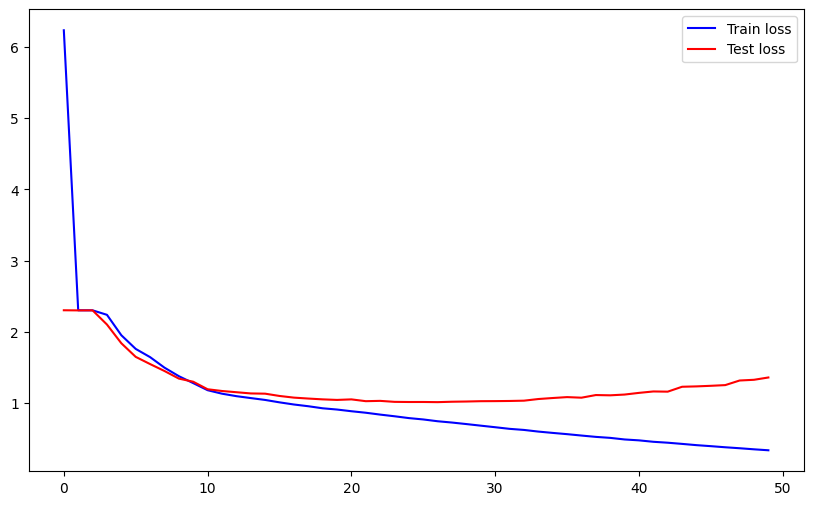

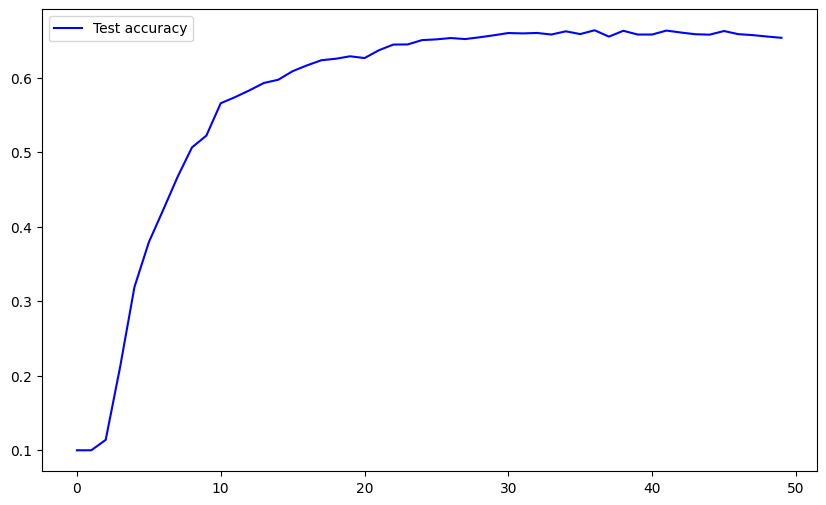

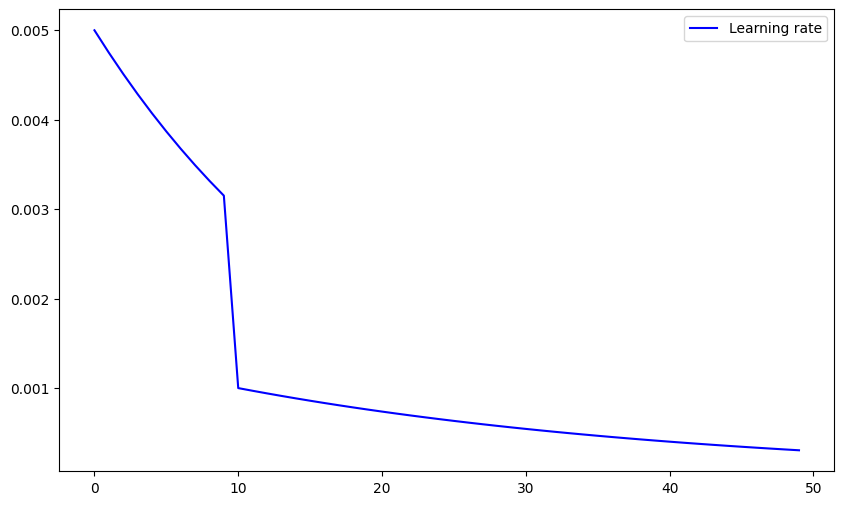

In [4]:
import util
loss_func= nn.CrossEntropyLoss()
model_path = util.cnn_train_eval(
    trainloader=train_loader,
    testloader=test_loader,
    model=model,
    lossf=loss_func,
    num_epochs=50,
    lr=5e-3,
    gamma=0.98,
    log_step=1,
    warmup_nepochs=10,
    warmup_lr=1e-2,
    warmup_gamma=0.95,
    save=True,
    mixed=True,
    save_path="checkpoint/cnn_model",
    optimizer_type=torch.optim.Adam,
    device=device,
    metadata_extra={
        "batch_size" : batch_size,
        "dataset_name" : "cifar10"
    }
)

In [5]:
print(model_path)

checkpoint/cnn_model\2024-12-09_17-19-22\model.pt


In [6]:
model = torch.load(model_path, weights_only=False)

Label: airplane , Predicted: airplane


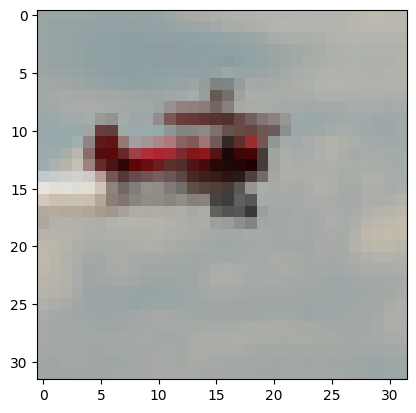

In [7]:
data_dir = './data_encoder/cifar10'
classes = os.listdir(data_dir + "/train")

def predict_image(img, model):
   img = img.unsqueeze(0).to(device)
   output = model(img)
   _, pred = torch.max(output, dim=1)
   return train_ds.classes[pred[0].item()]
img, label = test_ds[102]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))